# Importing the necessary libraries

In [2]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

2024-10-28 22:15:10.433863: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-28 22:15:10.570571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730133910.626299   24342 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730133910.640658   24342 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 22:15:10.771313: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Function Definitions

In [3]:
# Function to apply a Sobel Filter
def apply_sobel_filter(image):
    img_array = np.array(image, dtype=float)

    # Defining the Sobel Filters/Kernels - Edge Detection
    sobel_x = np.array([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]])

    sobel_y = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])

    image_height = img_array.shape[1]
    image_width = img_array.shape[2]

    # Initializing the Gradients as Array of zeroes
    gradient_x = np.zeros_like(img_array)
    gradient_y = np.zeros_like(img_array)

    for num in range(img_array.shape[0]):
        for x in range(1, image_height-1):
            for y in range(1, image_width-1):
                patch = img_array[num][x-1 : x+2, y-1 : y+2]
                gradient_x[num][x, y] = np.sum(patch * sobel_x)
                gradient_y[num][x, y] = np.sum(patch * sobel_y)

    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)

    gradient_x = (gradient_x - np.min(gradient_x)) / (np.max(gradient_x) - np.min(gradient_x))
    gradient_y = (gradient_y - np.min(gradient_y)) / (np.max(gradient_y) - np.min(gradient_y))
    gradient_magnitude = (gradient_magnitude - np.min(gradient_magnitude)) / (np.max(gradient_magnitude) - np.min(gradient_magnitude))

    return gradient_x, gradient_y, gradient_magnitude


# Function to display graphs/plot the results
def display_results(image, gradient_x, gradient_y, gradient_magnitude):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')


    axes[0, 1].imshow(gradient_x, cmap='gray')
    axes[0, 1].set_title('Horizontal Edges (Sobel X)')
    axes[0, 1].axis('off')


    axes[1, 0].imshow(gradient_y, cmap='gray')
    axes[1, 0].set_title('Vertical Edges (Sobel Y)')
    axes[1, 0].axis('off')


    axes[1, 1].imshow(gradient_magnitude, cmap='gray')
    axes[1, 1].set_title('Edge Magnitude')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Importing the Fashion MNIST dataset

In [4]:
# Importing Fashion MNIST Dataset
(train_image_data, train_image_label), (test_image_data, test_image_label) = tensorflow.keras.datasets.fashion_mnist.load_data()

# Exploring the dataset's shape

In [5]:
# Checking the dataset shape
print("\nTraining Image Data: ", train_image_data.shape)
print("Training Image Labels: ", train_image_label.shape)
print("\nTesting Image Data: ", test_image_data.shape)
print("Testing Image Labels: ", test_image_label.shape)


Training Image Data:  (60000, 28, 28)
Training Image Labels:  (60000,)

Testing Image Data:  (10000, 28, 28)
Testing Image Labels:  (10000,)


# Applying the Sobel Filter to all the training dataset

In [6]:
# Applying Sobel Filter to the dataset
gradient_x, gradient_y, gradient_magnitude = apply_sobel_filter(train_image_data)

# Displaying the First element after applying filters

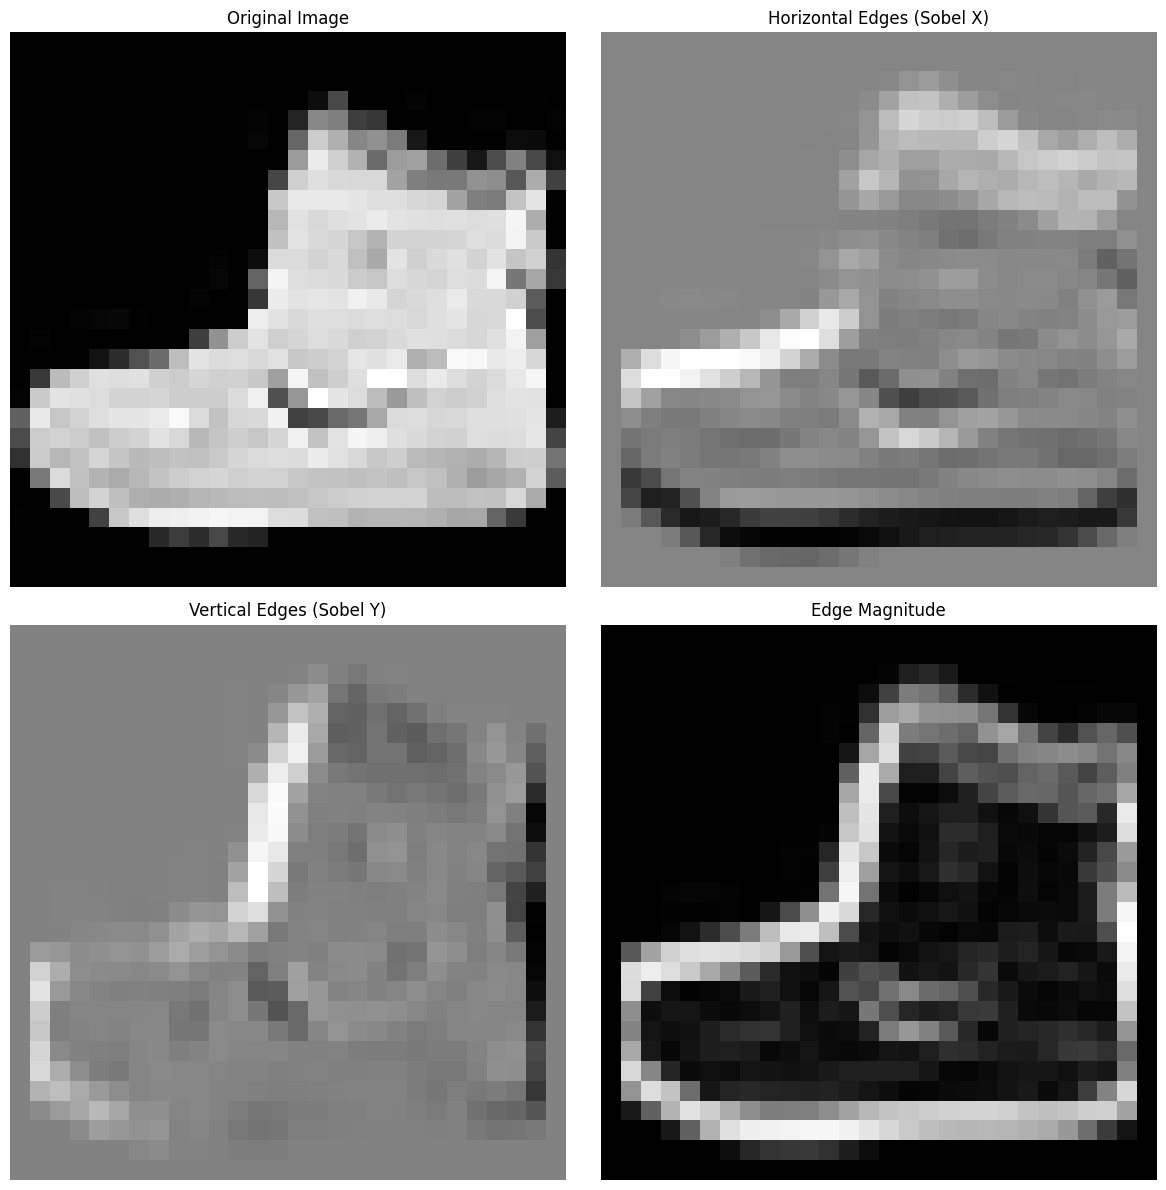

In [7]:
# Displaying the Results after applying the filters

display_results(train_image_data[0], gradient_x[0], gradient_y[0], gradient_magnitude[0])

# Kernel Definitions

In [12]:
kernels = {
    'Edge Detection': np.array([
        [[-1, -1, -1],
         [-1, 8, -1],  
         [-1, -1, -1]],
    ]),
    'Vertical Lines': np.array([
       [-1, 2, -1],
       [-1, 2, -1],
       [-1, 2, -1] 
    ]),
    'Blur': (1/9) * np.ones((3, 3))
}